<a href="https://colab.research.google.com/github/SamiraAsadzadeh/Neural-network-exercises/blob/main/Genetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **By: Samira Asadzadeh  40116341054541**

*   **Advisor:  Dr. Mr.Asadi**

*  **ISLAMIC AZAD UNIVERSITY SHIRAZ BRANCH Faculty of engineering**



# بهینه سازی شبکه عصبی با الگوریتم ژنتیک

In [ ]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=589675edef27d62dfb8c770b41043d1d08046ecbf11a9d52d2dc6666503b7b03
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


In [ ]:
import random
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

In [ ]:
# تابع ارزیابی: این تابع برای ارزیابی هر فرد در جمعیت استفاده می‌شود
def fitness_function(X):
      #Dataset
      x = np.array ([[1,2,3]])
      T = np.array ([[0.9,2.1,2.8]])
    #وزن  و بایاس
      w1 = X[0]
      w2 = X[1]
      w3 = X[2]
      w4 = X[3]
      w5 = X[4]
      w6 = X[5]
      b1 = X[6]
      b2 = X[7]
      b3 = X[8]
      b4 = X[9]
      Error1 = []
      for sample in range(x.size):
    # لایه پنهان
        TF1 = lambda x:x
        Z = []
        w = [w1, w2, w3]
        b = [b1, b2, b3]
        for i , k in zip(w, b):
          Z.append(TF1(i*x[0, sample]+k))
    # لایه خروجی
        TF2 = lambda x:x
        sum1 = 0
        W2= [w4, w5, w6]
        for j in range(3):
            sum1 += Z[j]*W2[j]
        out = TF2(sum1+b4)
        Error1.append(np.abs(out-T[0, sample]))
        #print(np.sum(Error1))
      return np.sum(Error1)

# تولید جمعیت اولیه
def generate_population(population_size, gene_length):
    population = []
    for _ in range(population_size):
        individual = [random.randint(0, 1) for _ in range(gene_length)]
        population.append(individual)
    return population

# انتخاب والدین برای تولید فرزندان
def select_parents(population):
    parents = []
    for _ in range(2):
        parent = random.choice(population)
        parents.append(parent)
    return parents

# ترکیب دو والدین برای تولید فرزند
def crossover(parents):
    child = []
    for gene_index in range(len(parents[0])):
        if random.random() < 0.5:
            child.append(parents[0][gene_index])
        else:
            child.append(parents[1][gene_index])
    return child

# جهش فرزند
def mutate(child, mutation_rate):
    for gene_index in range(len(child)):
        if random.random() < mutation_rate:
            child[gene_index] = 1 - child[gene_index]
    return child

# الگوریتم ژنتیک
def genetic_algorithm(population_size, gene_length, generations, mutation_rate):
    population = generate_population(population_size, gene_length)
    for _ in range(generations):
        new_population = []
        for _ in range(population_size):
            parents = select_parents(population)
            child = crossover(parents)
            child = mutate(child, mutation_rate)
            new_population.append(child)
        population = new_population
    best_individual = max(population, key=fitness_function)
    return best_individual

# تست الگوریتم ژنتیک
population_size = 10
gene_length = 10
generations = 50
mutation_rate = 0.01


best_individual = genetic_algorithm(population_size, gene_length, generations, mutation_rate)
print("Best Individual:", best_individual)
print("Fitness Score:", fitness_function(best_individual))

Best Individual: [1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
Fitness Score: 18.2


 The best solution found:
 [1.27941229 0.56919916 2.02011028 0.31353412 0.50371913 0.01638185
 1.0413821  0.0538344  4.15525687 0.21656911]

 Objective function:
 0.480164276242102


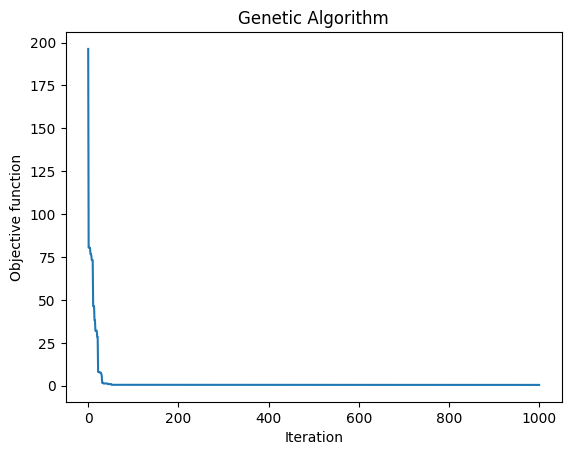

In [ ]:
def f(X):
#Dataset
  x = np.array ([[1,2,3]])
  T = np.array ([[0.9,2.1,2.8]])
#وزن  و بایاس
  w1 = X[0]
  w2 = X[1]
  w3 = X[2]
  w4 = X[3]
  w5 = X[4]
  w6 = X[5]
  b1 = X[6]
  b2 = X[7]
  b3 = X[8]
  b4 = X[9]
  Error1 = []
  for sample in range(x.size):
# لایه پنهان
    TF1 = lambda x:x
    Z = []
    w = [w1, w2, w3]
    b = [b1, b2, b3]
    for i , k in zip(w, b):
      Z.append(TF1(i*x[0, sample]+k))
 # لایه خروجی
    TF2 = lambda x:x
    sum1 = 0
    W2= [w4, w5, w6]
    for j in range(3):
        sum1 += Z[j]*W2[j]
    out = TF2(sum1+b4)
    Error1.append(np.abs(out-T[0, sample]))
    #print(np.sum(Error1))
  return np.sum(Error1)

varbound=np.array([[0,10]]*10)

algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':10,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=f,\
            dimension=10,\
            variable_type='real',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)

model.run()